In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from termcolor import colored, cprint
%matplotlib inline

In [55]:
def predict(w,b,x,y):
    pred = np.dot(x,w)+b
    n = x.shape[0]
    pred[pred>0] = 1
    pred[pred<0] = -1
    t = np.sum(pred == y)
    #print(x.shape,y.shape)
    acc = t/n
    return acc*100

In [56]:
def train_svm(x,y,lr,lambd,epochs = 100): #lambd = 1/nC
    n = x.shape[0]
    w = np.zeros([len(x[0]),1])
    loss_ar = []
    b = 0
    acc_ar = []
    acc_ar.append(0)
    for epoch in range(epochs):
        dw = np.zeros(w.shape)
        z = np.maximum(0,1-y*(np.dot(x,w)+b))
        loss = np.sum(z) + lambd*np.sum(w*w)/2
        loss_ar.append(loss)
        dw = lambd*w - 1/n *(np.sum((x*y),axis = 0).reshape(-1,1))
        q = x*y
        for i in range(n):
            if(z[i] == 0):
                q[i][:] = 0
        dw = lambd*w - (np.sum(q,axis = 0).reshape(-1,1))/n
        w = w - lr * dw
        acc = predict(w,b,x,y)
        acc_ar.append(acc)
        b = lr*np.sum(y - np.dot(x,w))/n
        if(loss<1):
            cprint("epoch {}, loss = {}, accuaracy = {}.\nTerminating due to reaching threshold of loss < 1".format(epoch+1,loss,acc), 'red',attrs=['bold'])
            return w,b,loss_ar,acc_ar
        if(acc>99):
            cprint("epoch {}, loss = {}, accuaracy = {}.\nTerminating due to reaching threshold of train accuracy > 99".format(epoch+1,loss,acc), 'red',attrs=['bold'])
            return w,b,loss_ar,acc_ar
        if(not epoch):
            print("epoch {}, loss = {}, accuaracy = {}.".format(epoch,loss,acc))
        elif(epoch <101):
            if(epoch%99 == 0):
                print("epoch {}, loss = {}, accuaracy = {}.".format(epoch+1,loss,acc))
        elif(epoch%499 ==0):
            print("epoch {}, loss = {}, accuaracy = {}.".format(epoch+1,loss,acc))
        
    return w,b,loss_ar,acc_ar

In [57]:
def train_multi_svm(train_set,test_set,y_train,y_test):
    accuracy = []
    arr = len(np.unique(y_test))
    loss_t = []
    parameters = {}
    cprint("Found {} unique labels. Training {} Support vector machines".format(arr,arr),'blue','on_yellow',attrs=['bold'])
    for i in range(len(np.unique(y_test))):         #one vs all method(6 different lables are there hence 6 SVM) instead of n*(n-1)/2 SVMs.
        y = y_train.copy()
        y[y != i] = -1
        y[y == i] = 1
        y = y.reshape(-1,1)
        #print("test",np.unique(y))
        yt = y_test.copy()    #yt = labels for test data 
        yt[yt != i] = -1
        yt[yt == i] = 1
        #print("test",np.unique(yt))
        yt = yt.reshape(-1,1)
        cprint("training SVM {} of 6".format(i+1), 'green',attrs=['bold'])
        w,b,loss,acc = train_svm(train_set.to_numpy(),y,0.01,0.1,1000)  #train_svm(x,y,lr,lambd,epochs)
        cprint("Test set accuracy = {}".format(predict(w,b,test_set,yt)), 'blue',attrs=['bold'])
        parameters[i] = {}
        parameters[i]["accuracy"] = acc
        parameters[i]["test_accuracy"] = predict(w,b,test_set,yt)
        parameters[i]["loss"] = loss
        parameters[i]["w"] = w
        parameters[i]["b"] = b
    return parameters
    

In [58]:
testdata = pd.read_csv('test.csv')
traindata = pd.read_csv('train.csv')

le = LabelEncoder()
le.fit(['WALKING_UPSTAIRS', 'SITTING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING', 'STANDING'])

y_train = traindata["Activity"]
y_train = le.fit_transform(y_train)

y_test = testdata["Activity"]
y_test = le.fit_transform(y_test)

traindata = traindata.drop(["Activity"],axis = 1)
train_set = traindata.drop(["subject"],axis = 1)
testdata = testdata.drop(["Activity"],axis = 1)
test_set = testdata.drop(["subject"],axis =1)

In [59]:
parameters = train_multi_svm(train_set,test_set,y_train,y_test)

Found 6 unique labels. Training 6 Support vector machines
training SVM 1 of 6
epoch 0, loss = 7352.0, accuaracy = 80.83514689880305.
epoch 33, loss = 1867.808459349812, accuaracy = 99.10228509249184.
Terminating due to reaching threshold of train accuracy > 99
Test set accuracy = 98.30335934848999
training SVM 2 of 6
epoch 0, loss = 7352.0, accuaracy = 82.48095756256801.
epoch 100, loss = 2372.0724933633783, accuaracy = 82.50816104461371.
epoch 500, loss = 1858.05078561105, accuaracy = 89.89390642002176.
epoch 999, loss = 1564.1127232960614, accuaracy = 91.879760609358.
Test set accuracy = 92.26331862911435
training SVM 3 of 6
epoch 0, loss = 7352.0, accuaracy = 81.28400435255713.
epoch 100, loss = 2294.1519861998036, accuaracy = 81.40642002176278.
epoch 500, loss = 1441.5690709544076, accuaracy = 93.37595212187159.
epoch 999, loss = 1294.915580367408, accuaracy = 93.93362350380848.
Test set accuracy = 93.79029521547336
training SVM 4 of 6
epoch 0, loss = 7352.0, accuaracy = 83.2154515

In [60]:
print(parameters.keys())
print(parameters[0].keys())

dict_keys([0, 1, 2, 3, 4, 5])
dict_keys(['accuracy', 'test_accuracy', 'loss', 'w', 'b'])


SVM 0 accuracy = 98.30335934848999
SVM 1 accuracy = 92.26331862911435
SVM 2 accuracy = 93.79029521547336
SVM 3 accuracy = 99.01594842212418
SVM 4 accuracy = 96.09772650152698
SVM 5 accuracy = 94.57074991516797
Average accuracy = 95.67356633864948


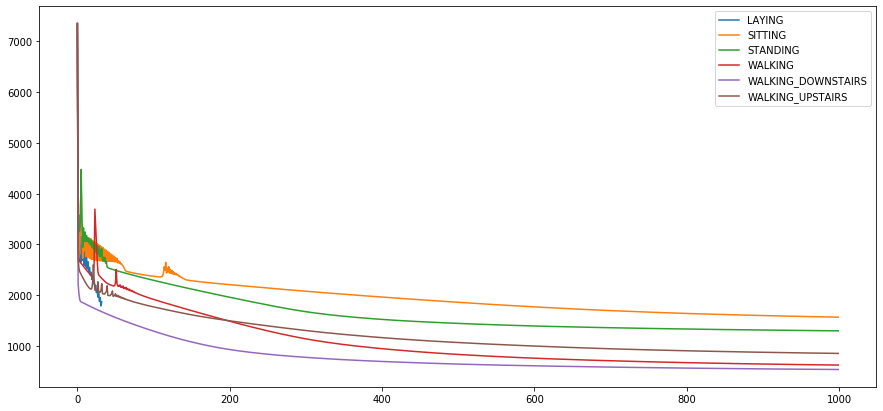

In [66]:
avg = 0
fig, axes = plt.subplots(1, 1, figsize=(15,7))
for i in range(6):
    print("SVM {} accuracy = {}".format(i,parameters[i]["test_accuracy"]))
    avg =avg + parameters[i]["test_accuracy"]
    axes.plot(parameters[i]["loss"])
axes.legend(le.inverse_transform([0,1,2,3,4,5]))
'''
axes[1].axis(ymin=0,ymax=100)
for i in range(6):
    axes[1].plot(parameters[i]["accuracy"])
axes[1].legend(le.inverse_transform([0,1,2,3,4,5]))'''
cprint("Average accuracy = {}".format(avg/6),'red',attrs=['bold'])
